In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_ins = pd.read_csv("./02_Data_set_보험.csv" ,encoding = "euc-kr")
df_loan = pd.read_csv("./01_Data_set_대출.csv",encoding = "euc-kr")

In [4]:
df = pd.merge(df_ins,df_loan, on = ['CUST_ID'])

# 직업별 실효해지건수 분석

In [16]:
df['OCCP_NAME_G'].value_counts()

주부          27565
사무직         16581
2차산업 종사자     9601
자영업          9485
3차산업 종사자     8275
공무원          5091
전문직          5043
단순 사무직       4107
학생           3835
운전직          2126
기타           1672
고소득 전문직      1223
*            1189
1차산업 종사자     1178
기업/단체 임원     1041
예체능계 종사자      936
단순 노무직        821
Name: OCCP_NAME_G, dtype: int64

In [4]:
# 직업별 실효해지건수 
job_lamt = df_ins.groupby('OCCP_NAME_G')[['CNTT_LAMT_CNT','CUST_JOB_INCM']].mean()
job_lamt = job_lamt.reset_index().round(3)
job_lamt.corr()

,CNTT_LAMT_CNT,CUST_JOB_INCM
CNTT_LAMT_CNT,1.000000,-0.235184
CUST_JOB_INCM,-0.235184,1.000000


In [5]:
# 직업별 실효해지건수 
job_lamt = df_ins.groupby('OCCP_NAME_G')[['CNTT_LAMT_CNT','CUST_JOB_INCM']].mean()
job_lamt = job_lamt.reset_index().round(3)
job_lamt

,OCCP_NAME_G,CNTT_LAMT_CNT,CUST_JOB_INCM
0,*,0.119,3236.417
1,1차산업 종사자,0.098,2995.671
2,2차산업 종사자,0.111,4014.707
3,3차산업 종사자,0.170,3492.350
4,고소득 전문직,0.048,6223.549
5,공무원,0.078,4189.550
6,기업/단체 임원,0.073,6808.453
7,기타,0.105,0.000
8,단순 노무직,0.135,2435.810
9,단순 사무직,0.131,3947.212


In [6]:
job_lamt.drop([0,7,15,16], inplace=True)
# 주부, 학생, 기타 직업에 대한 로우 삭제 
# -> 주부와 학생은 자신들의 소득으로 생계를 유지하는 것이 아니며 기타는 그 소득의 근원을 모르기에 삭제하여 상관계수의 유의미성을 확보 

In [50]:
job_lamt.corr()

,CNTT_LAMT_CNT,CUST_JOB_INCM
CNTT_LAMT_CNT,1.000000,-0.634241
CUST_JOB_INCM,-0.634241,1.000000


In [52]:
job_lamt.to_csv('./직업별해지건수_소득.csv', encoding = 'euc-kr')

In [54]:
df = pd.merge(df_ins,df_loan, on = ['CUST_ID'])

# 막내자녀나이 결측치 처리

In [78]:
df_ins[(df_ins['LAST_CHLD_AGE']==0.0) & (df_ins['AGE']=='35')]['LAST_CHLD_AGE'].replace({0.0:18.0}, inplace=True)

In [79]:
df_ins[df_ins['AGE']=='35']

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_OCCP_NAME_G,MATE_JOB_INCM,CRDT_LOAN_CNT,...,TOT_PREM,FMLY_TOT_PREM,CNTT_LAMT_CNT,LT1Y_CTLT_CNT,AUTR_FAIL_MCNT,FYCM_PAID_AMT,FMLY_CLAM_CNT,FMLY_PLPY_CNT,AGE,SEX
3,4,학생,0,10100,2,1,18.0,NaN,0,0,...,4000000,4000000,0,0,0,0,0,1,35,1
20,21,학생,0,0,3,1,18.0,NaN,0,0,...,1000000,1000000,0,0,0,0,0,0,35,1
21,22,주부,0,6000,3,2,4.0,NaN,0,0,...,6000000,30000000,0,0,0,14600000,31,0,35,2
36,37,주부,0,4600,3,1,34.0,NaN,0,0,...,5000000,5000000,0,0,0,25300000,2,0,35,1
41,42,단순 사무직,3900,10000,4,2,18.0,사무직,6200,0,...,15000000,22000000,0,0,2,7500000,10,2,35,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100177,102196,사무직,3200,3200,1,1,18.0,NaN,0,0,...,0,0,0,0,0,0,0,0,35,1
100184,102203,주부,0,10600,4,1,24.0,자영업,5900,0,...,45000000,45000000,0,0,1,4000000,3,1,35,2
100205,102225,단순 사무직,4000,7000,1,1,18.0,NaN,0,0,...,21000000,21000000,1,0,1,0,0,0,35,2
100216,102236,사무직,4000,5900,2,1,18.0,NaN,0,0,...,2000000,2000000,0,0,0,0,0,0,35,1


In [77]:
for i in range(len(df_ins['LAST_CHLD_AGE'])):
    # 나이 35인 사람에 대해 막내자녀 결측치 처리 (18 대체)
    if (df_ins.loc[i, 'LAST_CHLD_AGE'] == 0.0) & (df_ins.loc[i, 'AGE'] == '35'):
        df_ins.loc[i, 'LAST_CHLD_AGE'] = 18
    # 나이 40인 사람에 대해 막내자녀 결측치 처리 (17 대체)
    if (df_ins.loc[i, 'LAST_CHLD_AGE'] == 0.0) & (df_ins.loc[i, 'AGE'] == '40'):
        df_ins.loc[i, 'LAST_CHLD_AGE'] = 17


Series([], Name: LAST_CHLD_AGE, dtype: float64)

# 보험.csv 슬라이드 3 결측치 처리

In [5]:
# 보험료 연체율
df['PREM_OVDU_RATE'].value_counts()

0      27233
1       9094
2       8970
3       6362
4       5324
       ...  
82         8
85         8
99         7
96         4
100        4
Name: PREM_OVDU_RATE, Length: 93, dtype: int64

## 파생변수 생성 (예상 타겟변수_실효해지건수)

In [6]:
# 'CNTT_LAMT_CNT' - 실효해지건수 파생변수 생성
_list = []
for cnt in df['CNTT_LAMT_CNT']:
    if cnt == 0: # 0 : 실효해지 무 
        _list.append(0)
    else:
        _list.append(1) # 실효해지한 값에 대해새는 1로 처리 => 1: 실효해지 유 

df["Target"] = _list

# 'LT1Y_CTLT_CNT' - 최근 1년 실효해지건수 파생변수 생성
_list = []
for cnt in df['LT1Y_CTLT_CNT']:
    if cnt == 0: # 0 : 실효해지 무 
        _list.append(0)
    else:
        _list.append(1) # 실효해지한 값에 대해새는 1로 처리 => 1: 실효해지 유 

df["Target_year"] = _list


In [7]:
df['Target'].describe()

count    100233.000000
mean          0.083037
std           0.275939
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Target, dtype: float64

In [8]:
df['Target'].value_counts()

0    91910
1     8323
Name: Target, dtype: int64

In [9]:
df['Target_year'].value_counts()

0    98556
1     1677
Name: Target_year, dtype: int64

## 직업별 추정소득 분포 확인

In [10]:
# 직업의 결측치, * 값을 가진 인덱스 추출
idx = df[df['OCCP_NAME_G']=='*'].index
idx

Int64Index([    22,     23,    103,    114,    165,    276,    288,    326,
               385,    498,
            ...
             99118,  99155,  99234,  99542,  99568,  99647,  99839,  99864,
             99911, 100226],
           dtype='int64', length=1189)

In [11]:
# 직업 결측치 삭제하여 새로운 df에 저장
df1 = df.drop(idx)

In [12]:
# 소득의 결측치 인덱스 반환
idx = df1[df1['CUST_JOB_INCM']==0].index
idx

Int64Index([     2,      3,      6,      7,      8,     10,     11,     12,
                14,     15,
            ...
            100200, 100206, 100207, 100210, 100212, 100213, 100215, 100218,
            100219, 100223],
           dtype='int64', length=39889)

In [13]:
# 소득 결측치 제거 
df1 = df1.drop(idx)

In [14]:
df1[['OCCP_NAME_G','CUST_JOB_INCM']]

,OCCP_NAME_G,CUST_JOB_INCM
0,공무원,5400
1,자영업,5500
4,공무원,4800
5,3차산업 종사자,4400
9,단순 사무직,4700
...,...,...
100228,자영업,5500
100229,운전직,4600
100230,자영업,4800
100231,사무직,4200


In [15]:
df[(df['OCCP_NAME_G']=='*') & (df['Target']==1)]

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_OCCP_NAME_G,MATE_JOB_INCM,CRDT_LOAN_CNT,...,BNK_LNIF_AMT,CPT_LNIF_AMT,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year
276,280,*,4200,9500,5,2,NaN,*,5400,0,...,0,90001,0,0,5,121,0,0,1,1
665,673,*,0,6100,4,3,NaN,*,0,0,...,69001,0,85,0,2,121,4,770001,1,0
1527,1561,*,4500,10000,4,1,NaN,*,5500,0,...,426001,0,97,0,3,121,0,0,1,0
2399,2450,*,0,8400,2,1,NaN,*,0,0,...,27001,0,37,0,1,121,0,0,1,0
6452,6573,*,8400,20000,3,1,NaN,*,10000,0,...,12001,0,25,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94519,96441,*,5200,10100,3,2,NaN,*,5000,0,...,0,18001,1,25,1,13,0,0,1,0
96423,98379,*,0,0,3,2,0.0,NaN,0,0,...,1,0,1,0,0,0,0,0,1,1
98941,100943,*,5700,9900,5,2,NaN,*,4300,0,...,0,0,121,121,0,0,0,0,1,0
99118,101122,*,0,5600,4,1,NaN,*,0,4,...,96001,0,1,0,5,121,0,0,1,0


In [16]:
# 직업이 기타인 행의 소득은 모두 0임 (1672개) -> 전체 데이터의 5프로보다 작은 값이므로 이에 대해 삭제할 수 있다고 판단
# 하지만 그 전에 Target의 값이 1인 소중한 경우들이 몇개인지 확인 -> 133개 (Target 1인 값 : 8323개)
# 따라서 직업이 기타인 행은 전부 삭제하겠다고 판단.
df[(df['OCCP_NAME_G']=='기타') & (df['Target']==1)]

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_OCCP_NAME_G,MATE_JOB_INCM,CRDT_LOAN_CNT,...,BNK_LNIF_AMT,CPT_LNIF_AMT,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT,Target,Target_year
917,935,기타,0,5100,4,2,44.0,기업/단체 임원,0,0,...,0,6001,1,1,4,121,0,0,1,0
4607,4696,기타,0,5900,5,3,34.0,NaN,0,0,...,0,18001,0,1,2,121,1,1,1,1
5400,5501,기타,0,2400,4,2,44.0,NaN,0,0,...,15001,1,25,37,5,121,0,0,1,0
5820,5928,기타,0,4000,3,2,44.0,전문직,0,0,...,12001,1,25,0,3,97,0,0,1,0
5864,5973,기타,0,3400,2,2,0.0,NaN,0,0,...,3001,0,109,0,2,121,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98633,100632,기타,0,3600,4,3,44.0,NaN,0,4,...,0,0,121,121,0,0,0,0,1,0
98946,100948,기타,0,2500,4,2,44.0,주부,0,0,...,144001,66001,1,13,4,121,0,0,1,1
99470,101479,기타,0,4400,4,1,34.0,NaN,0,0,...,15001,0,1,0,1,97,0,0,1,0
99845,101857,기타,0,4200,4,3,39.0,단순 노무직,0,0,...,24001,0,13,0,2,13,0,0,1,1


In [17]:
job = ['사무직', '2차산업 종사자','자영업','3차산업 종사자','전문직','공무원','단순 사무직','운전직','고소득 전문직','기업/단체 임원',
       '예체능계 종사자', '1차산업 종사자','단순 노무직','주부','학생']

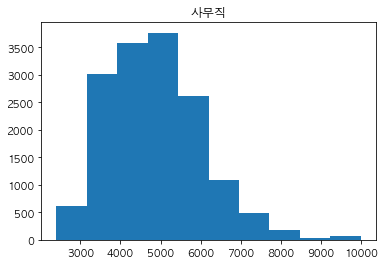

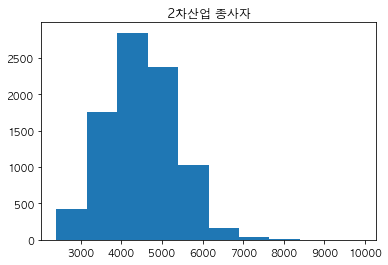

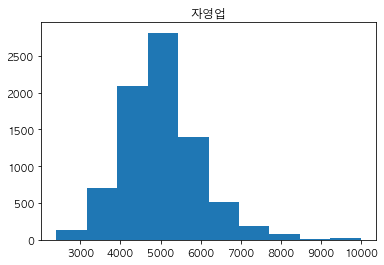

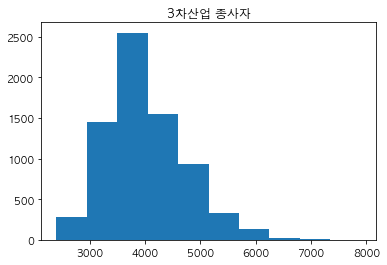

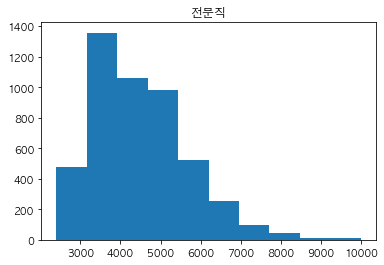

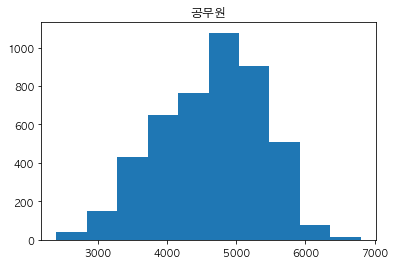

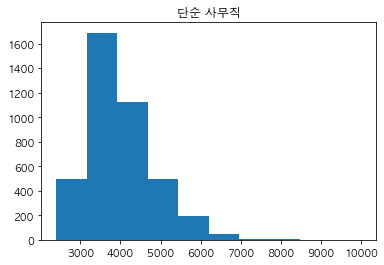

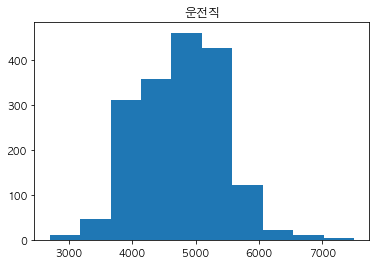

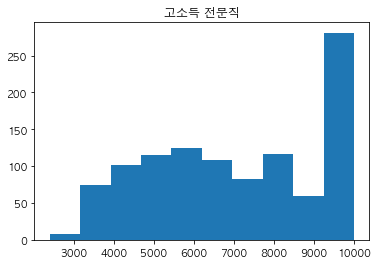

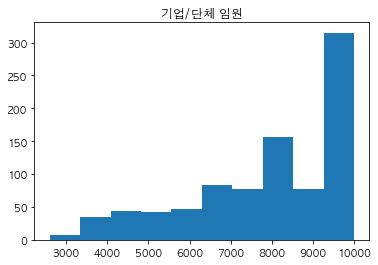

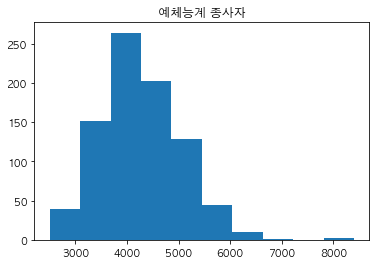

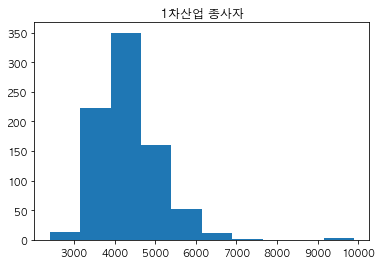

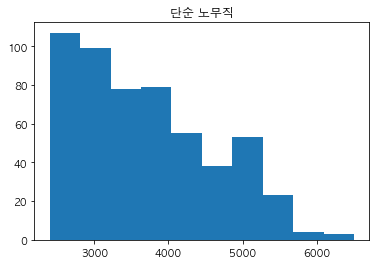

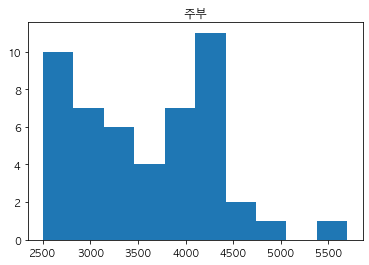

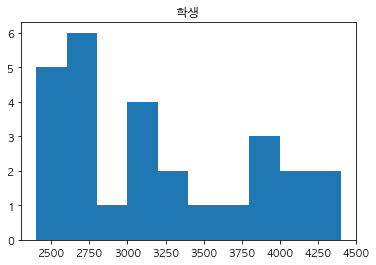

In [18]:
# 정규성 검정 전 1차적 확인으로 hist 
for j in job:
    plt.hist(df1[df1['OCCP_NAME_G'] == j]['CUST_JOB_INCM'])
    plt.title(j)
    plt.show()

In [19]:
from scipy.stats import shapiro

for j in job:
    _a = df1[df1['OCCP_NAME_G'] == j]['CUST_JOB_INCM']
    statistic, p = shapiro(_a)
    print(f"{j} : Shapiro Wilk Test: statistic = {statistic}, p-value={round(p,3)}")

사무직 : Shapiro Wilk Test: statistic = 0.9662870168685913, p-value=0.0
2차산업 종사자 : Shapiro Wilk Test: statistic = 0.9894324541091919, p-value=0.0
자영업 : Shapiro Wilk Test: statistic = 0.9627121090888977, p-value=0.0
3차산업 종사자 : Shapiro Wilk Test: statistic = 0.9673349857330322, p-value=0.0
전문직 : Shapiro Wilk Test: statistic = 0.9527883529663086, p-value=0.0
공무원 : Shapiro Wilk Test: statistic = 0.9878714084625244, p-value=0.0
단순 사무직 : Shapiro Wilk Test: statistic = 0.9467166066169739, p-value=0.0
운전직 : Shapiro Wilk Test: statistic = 0.9858201146125793, p-value=0.0
고소득 전문직 : Shapiro Wilk Test: statistic = 0.9114609956741333, p-value=0.0
기업/단체 임원 : Shapiro Wilk Test: statistic = 0.8812787532806396, p-value=0.0
예체능계 종사자 : Shapiro Wilk Test: statistic = 0.9772247076034546, p-value=0.0
1차산업 종사자 : Shapiro Wilk Test: statistic = 0.9056349396705627, p-value=0.0
단순 노무직 : Shapiro Wilk Test: statistic = 0.9531296491622925, p-value=0.0
주부 : Shapiro Wilk Test: statistic = 0.9364492893218994, p-value=0.01

In [20]:
from sklearn.preprocessing import LabelEncoder

items = df1['OCCP_NAME_G']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
labels

array([ 4, 11,  4, ..., 11,  8,  8])

In [21]:
df1['OCCP_NAME_G'] = labels 
df1['OCCP_NAME_G'].value_counts()

8     15441
1      8636
11     7960
2      7259
12     4808
4      4612
7      4048
10     1771
3      1071
5       886
9       842
0       814
6       539
15      392
13       49
14       27
Name: OCCP_NAME_G, dtype: int64

In [22]:
from sklearn.model_selection import cross_val_score
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


target = df1['CUST_JOB_INCM']
x_data = df1.drop(['CUST_ID'], axis=1)

train_x, test_x, train_y, test_y = train_test_split(x_data, target, test_size=0.3, random_state=1234)

parameters = {
     'task' : ['predict'],
     'boosting': ['gbdt','rf','dart','goss'],
     'objective': ['root_mean_squared_error'],
     'num_iterations': [  1500, 2000,5000  ],
     'learning_rate':[  0.05, 0.01 ],
    'num_leaves':[ 7, 15, 31  ],
    'max_depth' :[ 10,15,25],
    'min_data_in_leaf':[15,25 ],
   'feature_fraction': [ 0.6, 0.8,  0.9],
     'bagging_fraction': [  0.6, 0.8 ],
     'bagging_freq': [   100, 200, 400  ],

     
 }

lgb = LGBMRegressor(random_state=2022)
gsearch_lgb = GridSearchCV(lgb, param_grid = parameters, n_jobs=6, verbose=10)

In [23]:
gsearch_lgb.fit(train_x,train_y)

from sklearn.metrics import mean_squared_error

print('best params')
print (gsearch_lgb.best_params_)
preds_lgb_model = gsearch_lgb.predict(test_x)
rmse_lgb = np.sqrt(mean_squared_error(test_y, preds_lgb_model))
print(" RMSE: %f" % (rmse_lgb ))

Fitting 5 folds for each of 7776 candidates, totalling 38880 fits


In [109]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


target = df1['CUST_JOB_INCM']
x_data = df1.drop(['CUST_ID'], axis=1)

train_x, test_x, train_y, test_y = train_test_split(x_data, target, test_size=0.3, random_state=1234)

params = {
    'n_estimators':range(10,100,10),
    'max_depth' : range(3, 8),
    'min_samples_leaf' : range(8, 18),
    'min_samples_split' : range(8, 16)
}
rf_run = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_run, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(train_x, train_y)
 
 
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

ValueError: 
All the 7200 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3600 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/yjlee/miniforge3/envs/disney/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yjlee/miniforge3/envs/disney/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 331, in fit
    X, y = self._validate_data(
  File "/Users/yjlee/miniforge3/envs/disney/lib/python3.8/site-packages/sklearn/base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/yjlee/miniforge3/envs/disney/lib/python3.8/site-packages/sklearn/utils/validation.py", line 1074, in check_X_y
    X = check_array(
  File "/Users/yjlee/miniforge3/envs/disney/lib/python3.8/site-packages/sklearn/utils/validation.py", line 856, in check_array
    array = np.asarray(array, order=order, dtype=dtype)
  File "/Users/yjlee/miniforge3/envs/disney/lib/python3.8/site-packages/pandas/core/generic.py", line 2064, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: '주부'

--------------------------------------------------------------------------------
3600 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/yjlee/miniforge3/envs/disney/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yjlee/miniforge3/envs/disney/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 331, in fit
    X, y = self._validate_data(
  File "/Users/yjlee/miniforge3/envs/disney/lib/python3.8/site-packages/sklearn/base.py", line 596, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/yjlee/miniforge3/envs/disney/lib/python3.8/site-packages/sklearn/utils/validation.py", line 1074, in check_X_y
    X = check_array(
  File "/Users/yjlee/miniforge3/envs/disney/lib/python3.8/site-packages/sklearn/utils/validation.py", line 856, in check_array
    array = np.asarray(array, order=order, dtype=dtype)
  File "/Users/yjlee/miniforge3/envs/disney/lib/python3.8/site-packages/pandas/core/generic.py", line 2064, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: '예체능계 종사자'


## 최대 월 납입 보험료

In [22]:
df['MAX_MON_PREM'].value_counts().sort_index(ascending=False)

10000000      67
9990000       89
6990000      157
4990000      192
3990000      379
2990000      368
2490000      682
1990000     1260
1490000     1557
1190000     1987
990000      2506
790000      4517
590000      4191
490000      5011
390000      3616
340000      4006
300000      4256
260000      4114
230000      4561
200000      2630
190000      4632
160000      2421
150000      2340
140000      2290
130000      2359
120000      2436
110000      3495
100000      3507
90000       2286
80000       2442
70000       2803
60000       4000
50000       4121
40000       4909
30000       4242
9999          60
0           5744
Name: MAX_MON_PREM, dtype: int64